In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import RobustScaler

In [3]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

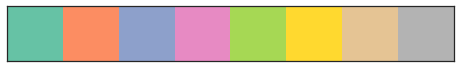

In [4]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

In [5]:
disabled_score=pd.read_csv("보행위험장애인지수.csv",encoding="cp949")

## 장애인  - 병원

In [6]:
hospital=pd.read_csv("의료기관수.csv",encoding="cp949")

In [7]:
hospital[hospital.duplicated(['행정동'])==True]

,행정동,의료기관수


In [8]:
disabled_hosipital=pd.merge(disabled_score,hospital,on="행정동")
disabled_hosipital

,행정동,보행취약장애인지수,의료기관수
0,가락1동,596,6
1,가락2동,1080,37
2,가락본동,860,86
3,가리봉동,651,12
4,가산동,908,65
...,...,...,...
419,효창동,362,12
420,후암동,849,15
421,휘경1동,626,28
422,휘경2동,1081,8


In [9]:
# 병원 = 0인 행정동 제거 (df_hospital)
df_hospital = disabled_hosipital.drop(index = disabled_hosipital[disabled_hosipital['의료기관수']==0].index)
df_hospital = df_hospital.reset_index(drop=True)
df_hospital

,행정동,보행취약장애인지수,의료기관수
0,가락1동,596,6
1,가락2동,1080,37
2,가락본동,860,86
3,가리봉동,651,12
4,가산동,908,65
...,...,...,...
418,효창동,362,12
419,후암동,849,15
420,휘경1동,626,28
421,휘경2동,1081,8


In [10]:
# scaling
scaler = RobustScaler()
df_hospital_scale=pd.DataFrame(scaler.fit_transform(df_hospital[['보행취약장애인지수','의료기관수']]),columns=df_hospital[['보행취약장애인지수','의료기관수']].columns)
df_hospital_scale.insert(0, '행정동', df_hospital['행정동'])
df_hospital_scale

,행정동,보행취약장애인지수,의료기관수
0,가락1동,-0.483117,-0.833333
1,가락2동,0.145455,0.200000
2,가락본동,-0.140260,1.833333
3,가리봉동,-0.411688,-0.633333
4,가산동,-0.077922,1.133333
...,...,...,...
418,효창동,-0.787013,-0.633333
419,후암동,-0.154545,-0.533333
420,휘경1동,-0.444156,-0.100000
421,휘경2동,0.146753,-0.766667


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


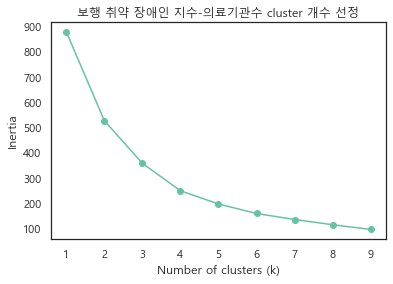

In [11]:
# elbow
data_hospital = df_hospital_scale.values
X= data_hospital[:,1:]
X
num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('보행 취약 장애인 지수-의료기관수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '보행 취약 장애인 지수와 의료기관 clustering')

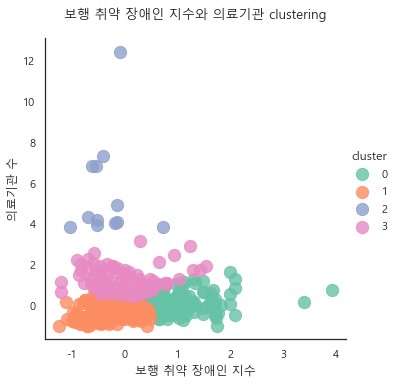

In [12]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_hospital_scale['cluster'] = kmeans.labels_

sns.lmplot(x='보행취약장애인지수',y='의료기관수', data = df_hospital_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('보행 취약 장애인 지수')
plt.ylabel('의료기관 수')
plt.title('보행 취약 장애인 지수와 의료기관 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster를 선정하기 애매함 <br>
보행취약장애인지수 > 0 인 값들을 filtering

In [13]:
df_hospital_scale_0 = df_hospital_scale[df_hospital_scale['보행취약장애인지수']>0]
df_hospital_scale_0 = df_hospital_scale_0.reset_index(drop=True)
df_hospital_scale_0

,행정동,보행취약장애인지수,의료기관수,cluster
0,가락2동,0.145455,0.200000,1
1,가양1동,0.005195,1.733333,3
2,가양2동,1.998701,0.066667,0
3,가양3동,1.105195,-0.733333,0
4,갈현1동,0.322078,0.400000,0
...,...,...,...,...
205,화곡6동,0.228571,0.000000,1
206,화곡8동,0.354545,0.233333,0
207,화곡본동,0.871429,0.200000,0
208,휘경2동,0.146753,-0.766667,1


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


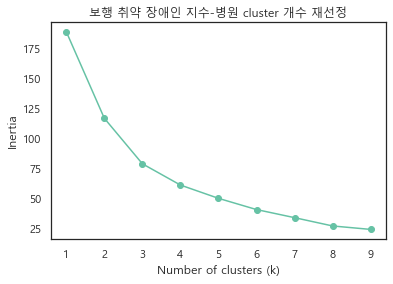

In [14]:
# elbow
data = df_hospital_scale_0.values
X=data[:,1:-1]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('보행 취약 장애인 지수-병원 cluster 개수 재선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 5 

Text(0.5, 1.0, '보행 취약 장애인 지수와 의료기관 2차 clustering')

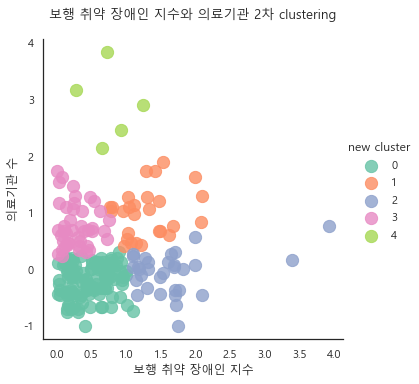

In [15]:
# clustering
kmeans = KMeans(n_clusters=5).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_hospital_scale_0['new cluster'] = kmeans.labels_

sns.lmplot(x= '보행취약장애인지수',y = '의료기관수', data = df_hospital_scale_0, fit_reg=False, scatter_kws={"s":150},hue="new cluster")
plt.xlabel('보행 취약 장애인 지수')
plt.ylabel('의료기관 수')
plt.title('보행 취약 장애인 지수와 의료기관 2차 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

### 선정 결과

cluster 4 (좌상단) + cluster 1 (장애인 지수가 높고, 의료기관이 어느정도 존재) 선정

In [16]:
result = df_hospital_scale_0[ (df_hospital_scale_0['new cluster']==4) | (df_hospital_scale_0['new cluster']==1)]
result

,행정동,보행취약장애인지수,의료기관수,cluster,new cluster
8,개봉2동,0.967532,0.400000,0,1
13,공덕동,1.024675,1.266667,3,1
14,공릉1동,2.089610,1.300000,0,1
17,구로2동,1.024675,0.633333,0,1
19,구로4동,0.766234,1.100000,3,1
35,대방동,1.109091,0.966667,0,1
36,대조동,0.651948,2.133333,3,4
49,망우본동,1.479221,1.200000,0,1
54,면목본동,1.480519,0.666667,0,1
64,발산1동,1.110390,1.133333,0,1


In [17]:
result.to_csv("보행취약장애인지수_의료시설수_clustering.csv",encoding="cp949")